## Day 26 Lecture 2 Assignment

In this assignment, we will learn about linear regression model assumptions

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We will load the dataset below that describes the antioxidant quality of lager.

The variables are as follows:
    
The dataset contains 7 variables :

- tpc - Total phenolic content
- ma - melanoidin content
- dsa - DPPH radical scavenging activity
- asa - ABTS radical cation scavenging activity
- orac - Oxygen radical absorbance activity
- rp - Reducing Power
- mca - Metal Chelaing Activity

In [2]:
lager = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lager_antioxidant_reg.csv')

lager.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


We would like to predict the level of total phenolic content using the remaining 6 variables.

Start by removing the beer column since this column is the id for the observations.

In [3]:
#answer below:
lager = lager.drop(columns='beer')
lager.head()

,tpc,ma,dsa,asa,orac,rp,mca
0,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,146.03,11.72,0.64,0.90,3.18,0.47,9.39


Split the data into train and test subsets. Select 25% of the data to be in the test subset. Use `tpc` as the y variable.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
# answer below:
X = lager.drop(columns='tpc')
y = lager['tpc']


In [8]:
#Size of the test set.
SIZE = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=SIZE)

#Generate Linear Model
Next, we'll generate a linear model and make a residual vs. fit (homoscedasticity) plot. All Gauss-Markov assumptions should be evaluated on the training set.

In [11]:
from sklearn import linear_model

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X_train, y_train)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [  1.619254   141.25023301  -4.55870172  -0.17240573  91.40480062
   0.26805217]

Intercept: 
 3.8718432421937337


In [14]:
predictions = lrm.predict(X_train)
errors = y_train - predictions

print("Mean of the errors in the model is: {}".format(np.mean(errors)))

Mean of the errors in the model is: -1.4210854715202005e-15


#Homoscedasticity - Heteroscedasticity Testing
How much heteroscedasticity is exhibited in the model?

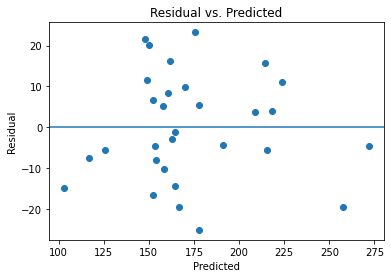

In [15]:
#A visual representation of scedascity.
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [16]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 27.6669 and p value is 1.44e-07
Levene test statistic value is 8.4949 and p value is 0.00505


Compute the VIF for all features in the model. You will need to add a constant to your data (make a new copy just for this) to compute this with statsmodels.

How collinear are your features?

In [70]:
# answer below:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_stats = X_train
# We need to manually add a constant
# in statsmodels' sm
X_stats = sm.add_constant(X_stats)

results = sm.OLS(y_train, X_stats).fit()

pd.Series([variance_inflation_factor(X_stats.values, i) for i in range(X_stats.shape[1])], index=X_stats.columns)

#results.summary()


const    39.630089
ma        1.623656
dsa       2.530355
asa       2.587202
orac      1.582320
rp        2.854823
mca       1.634981
dtype: float64

Our features are not very collinear.

Show a histogram of your error, and then plot the qq-plot for our errors (make sure to use a standardized line to compare them appropriately to the standard distribution.)

Remember to use training data.

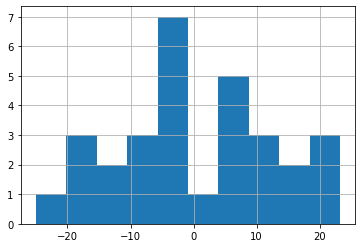

In [27]:
# answer below:
errors.hist()


#QQ Plot of Errors
Two ways of plotting errors against a normal distribution. Note the 's' assignment in the statsmodels qq plot. 

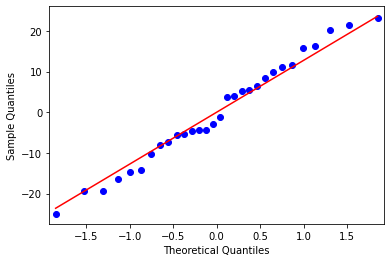

In [39]:
# answer below:
import pylab
sm.qqplot(errors, line="s")
pylab.show()

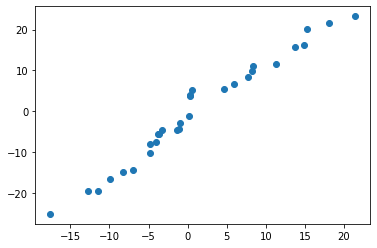

In [66]:
#QQ plot of errors against a randomly generated  normal distrubtion; done via numpy and plot.scatter
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.scatter(np.sort(rand_nums), np.sort(errors))
plt.show()

Plot the actual test data against test predictions to see how well your model predicts new data.

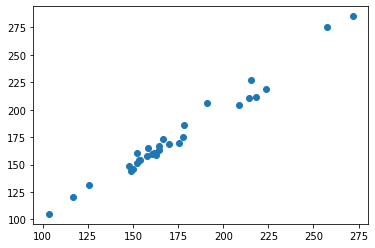

In [72]:
# answer below:
from sklearn.model_selection import cross_val_predict
predictions_test = cross_val_predict(lrm, X_train, y_train)
plt.scatter(x=predictions, y=predictions_test)
plt.show()

